In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [3]:
data = pd.read_csv(r"C:/Users/LENOVO/Downloads/historicall_projections.csv")

In [4]:
cat_columns =['position']
cat_columns

['position']

In [5]:
duplicate_mask = data.duplicated(keep='first')
duplicate_first_occurrence = data[duplicate_mask]
print("First occurrence of each duplicated row:")
print(duplicate_first_occurrence)

First occurrence of each duplicated row:
Empty DataFrame
Columns: [player, id, draft year, projected spm, superstar, starter, role player, bust, position_pf, position_pg, position_sf, position_sg]
Index: []


In [6]:
missing_values = data.isnull().sum()
missing_values

player           0
id               0
draft year       0
projected spm    0
superstar        0
starter          0
role player      0
bust             0
position_pf      0
position_pg      0
position_sf      0
position_sg      0
dtype: int64

In [8]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
cat_encoded = encoder.fit_transform(data[cat_columns])
cat_encoded

KeyError: "None of [Index(['position'], dtype='object')] are in the [columns]"

In [41]:

num_columns = ['projected spm', 'superstar', 'starter', 'role player', 'bust']
print("Numerical Columns:", num_columns)

# Normalize numerical features
scaler = MinMaxScaler()
data[num_columns] = scaler.fit_transform(data[num_columns])

# Output and print the preprocessed data
print(data.head())

Numerical Columns: ['projected spm', 'superstar', 'starter', 'role player', 'bust']
               player                  id  draft year  projected spm  \
0  karl-anthony towns  karl-anthony-towns        2015       0.784435   
1     justise winslow     justise-winslow        2015       0.739576   
2     stanley johnson     stanley-johnson        2015       0.683000   
3       jahlil okafor       jahlil-okafor        2015       0.637402   
4    d`angelo russell    d-angelo-russell        2015       0.634602   

   superstar   starter  role player      bust  position_pf  position_pg  \
0   0.740562  0.649198     0.185895  0.170822          0.0          0.0   
1   0.459001  0.777712     0.215150  0.101390          0.0          0.0   
2   0.372571  0.643902     0.432651  0.103145          0.0          0.0   
3   0.322656  0.622667     0.340790  0.202230          0.0          0.0   
4   0.835445  0.518874     0.043721  0.372551          0.0          1.0   

   position_sf  position_sg  
0 

In [43]:
output_file_path = r'C:\Users\LENOVO\Downloads\historicall_projections.csv'
data.to_csv(output_file_path, index=False)


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

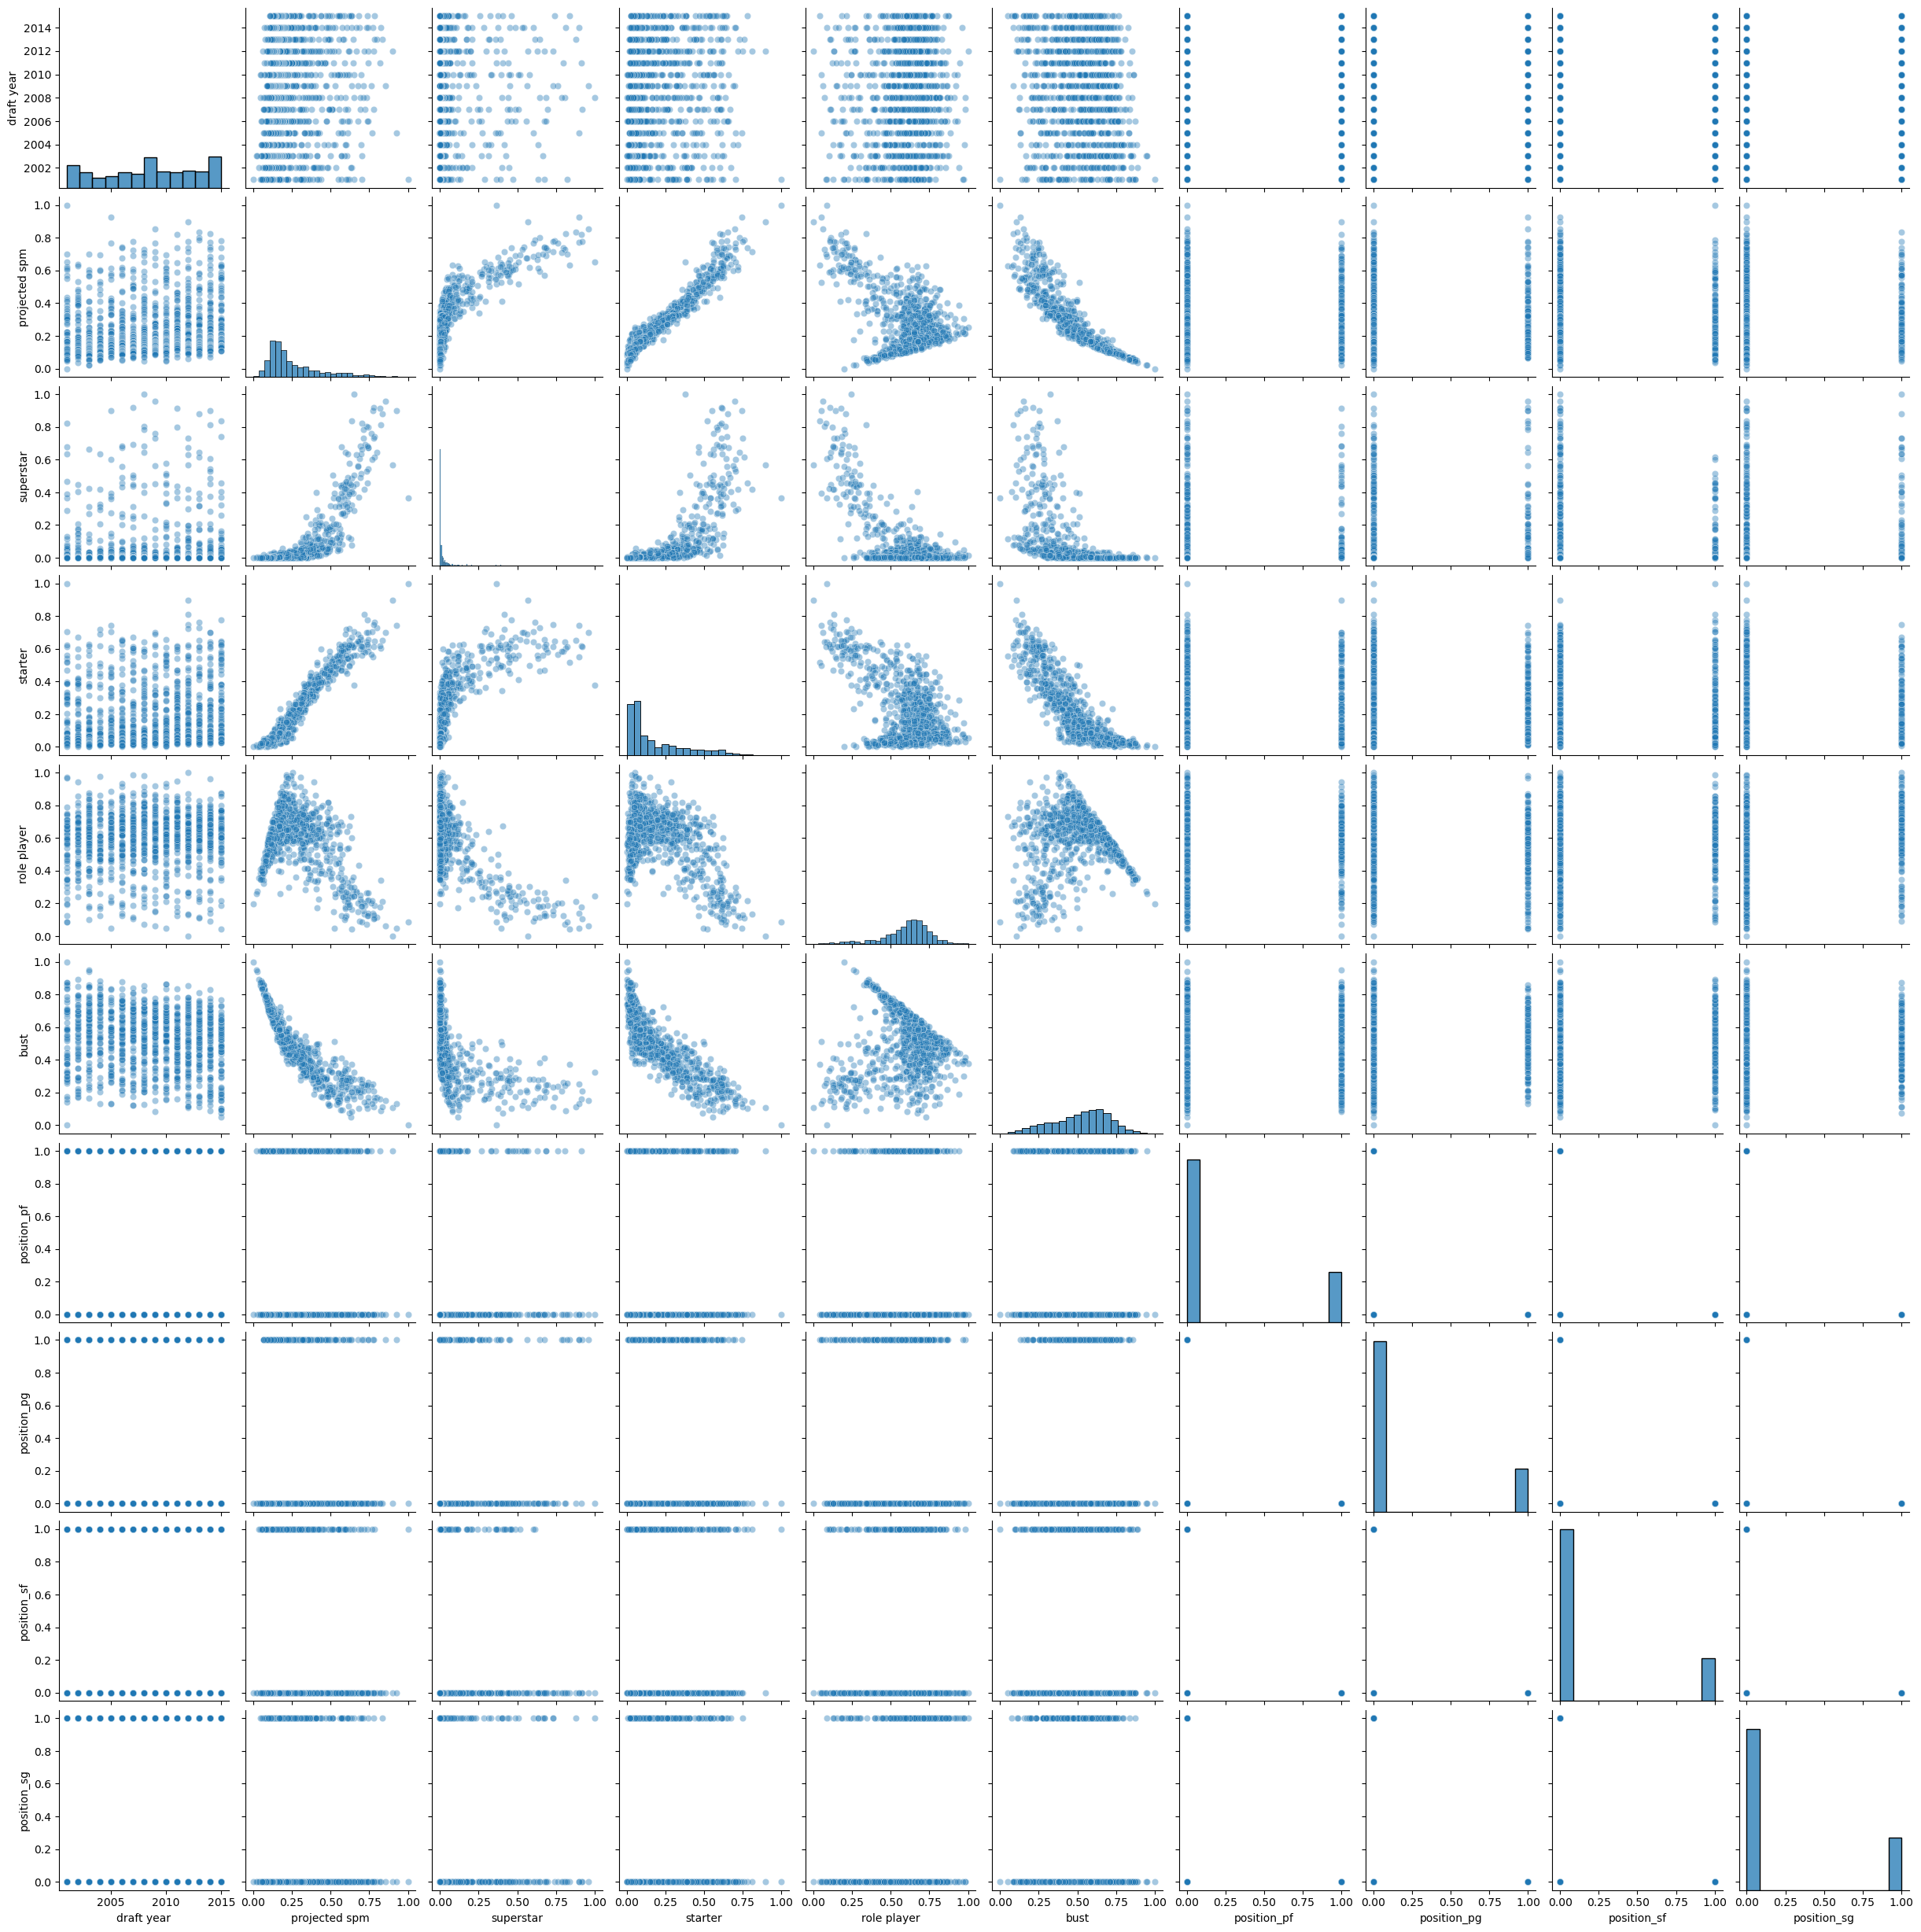

In [9]:
sns.pairplot(data, kind="scatter", plot_kws={'alpha':0.4})

In [21]:
data.isna().sum()

player           0
id               0
draft year       0
projected spm    0
superstar        0
starter          0
role player      0
bust             0
position_pf      0
position_pg      0
position_sf      0
position_sg      0
dtype: int64

In [22]:
X = data.drop([ 'player','id','draft year'], axis=1)

y = data['bust']
preprocessor = ColumnTransformer(
    
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Binarize or categorize the target variable for classification
# Example: classify productivity into "high" and "low" based on median
median_productivity = y.median()
y_cls = (y >= median_productivity).astype(int)

# Split the data into training and testing sets for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_preprocessed, y_cls, test_size=0.2, random_state=42)
# Initialize the regression model
regressor = LinearRegression()

# Train the regression model
regressor.fit(X_train_reg, y_train_reg)      

# Predict on the test set
y_pred_reg = regressor.predict(X_test_reg)

# Calculate accuracy metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Regression Mean Squared Error: {mse}")
print(f"Regression R^2 Score: {r2}")

Regression Mean Squared Error: 2.6126388185946664e-32
Regression R^2 Score: 1.0


In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier
nb_classifier.fit(X_train_cls, y_train_cls)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test_cls)

# Calculate accuracy metrics
nb_accuracy = accuracy_score(y_test_cls, y_pred_nb)
nb_precision = precision_score(y_test_cls, y_pred_nb)
nb_recall = recall_score(y_test_cls, y_pred_nb)
nb_f1 = f1_score(y_test_cls, y_pred_nb)

print(f"Naive Bayes Classifier Accuracy: {nb_accuracy}")
print(f"Naive Bayes Classifier Precision: {nb_precision}")
print(f"Naive Bayes Classifier Recall: {nb_recall}")
print(f"Naive Bayes Classifier F1-Score: {nb_f1}")


Naive Bayes Classifier Accuracy: 0.8807339449541285
Naive Bayes Classifier Precision: 0.8244274809160306
Naive Bayes Classifier Recall: 0.972972972972973
Naive Bayes Classifier F1-Score: 0.8925619834710745


In [24]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
dt_classifier.fit(X_train_cls, y_train_cls)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test_cls)

# Calculate accuracy metrics
dt_accuracy = accuracy_score(y_test_cls, y_pred_dt)
dt_precision = precision_score(y_test_cls, y_pred_dt)
dt_recall = recall_score(y_test_cls, y_pred_dt)
dt_f1 = f1_score(y_test_cls, y_pred_dt)

print(f"Decision Tree Classifier Accuracy: {dt_accuracy}")
print(f"Decision Tree Classifier Precision: {dt_precision}")
print(f"Decision Tree Classifier Recall: {dt_recall}")
print(f"Decision Tree Classifier F1-Score: {dt_f1}")


Decision Tree Classifier Accuracy: 1.0
Decision Tree Classifier Precision: 1.0
Decision Tree Classifier Recall: 1.0
Decision Tree Classifier F1-Score: 1.0


In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the KNN classifier
knn_classifier.fit(X_train_cls, y_train_cls)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test_cls)

# Calculate accuracy metrics
knn_accuracy = accuracy_score(y_test_cls, y_pred_knn)
knn_precision = precision_score(y_test_cls, y_pred_knn)
knn_recall = recall_score(y_test_cls, y_pred_knn)
knn_f1 = f1_score(y_test_cls, y_pred_knn)

print(f"KNN Classifier Accuracy: {knn_accuracy}")
print(f"KNN Classifier Precision: {knn_precision}")
print(f"KNN Classifier Recall: {knn_recall}")
print(f"KNN Classifier F1-Score: {knn_f1}")


KNN Classifier Accuracy: 0.963302752293578
KNN Classifier Precision: 0.9401709401709402
KNN Classifier Recall: 0.990990990990991
KNN Classifier F1-Score: 0.9649122807017545


In [26]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor
dt_regressor.fit(X_train_reg, y_train_reg)

# Predict on the test set
y_pred_dt_reg = dt_regressor.predict(X_test_reg)

# Calculate accuracy metrics
mse_dt_reg = mean_squared_error(y_test_reg, y_pred_dt_reg)
r2_dt_reg = r2_score(y_test_reg, y_pred_dt_reg)

print(f"Decision Tree Regressor Mean Squared Error: {mse_dt_reg}")
print(f"Decision Tree Regressor R^2 Score: {r2_dt_reg}")


Decision Tree Regressor Mean Squared Error: 2.008016031964098e-05
Decision Tree Regressor R^2 Score: 0.9994094495052526


In [27]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN Regressor
knn_regressor = KNeighborsRegressor()

# Train the KNN Regressor
knn_regressor.fit(X_train_reg, y_train_reg)

# Predict on the test set
y_pred_knn_reg = knn_regressor.predict(X_test_reg)

# Calculate accuracy metrics
mse_knn_reg = mean_squared_error(y_test_reg, y_pred_knn_reg)
r2_knn_reg = r2_score(y_test_reg, y_pred_knn_reg)

print(f"KNN Regressor Mean Squared Error: {mse_knn_reg}")
print(f"KNN Regressor R^2 Score: {r2_knn_reg}")



KNN Regressor Mean Squared Error: 0.0006710032969613924
KNN Regressor R^2 Score: 0.9802660276267775


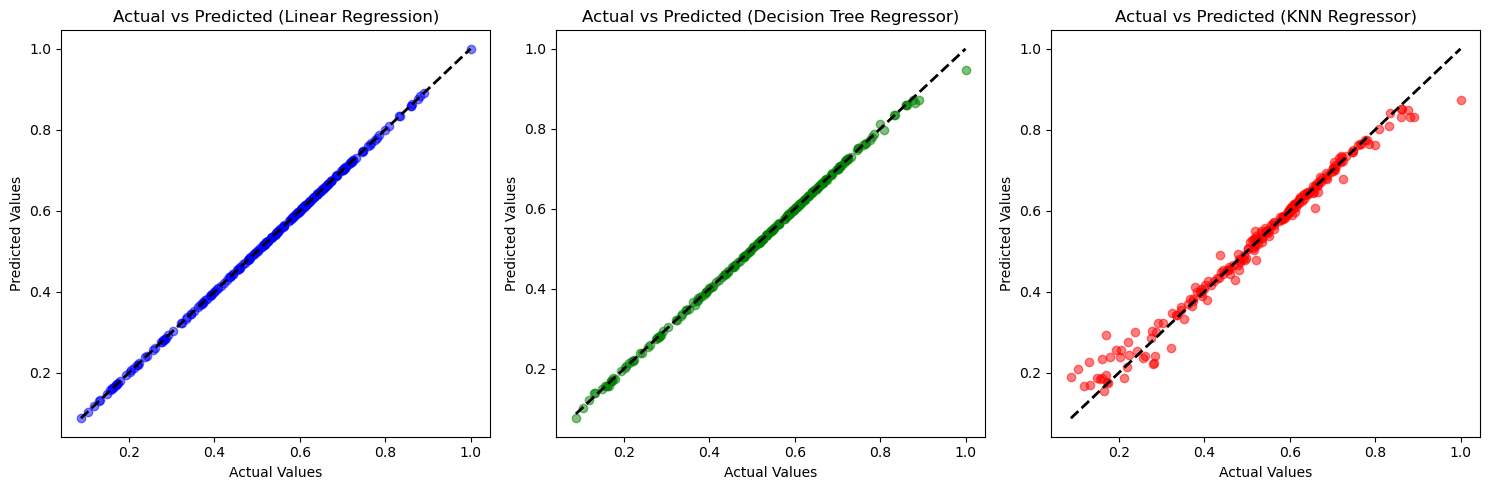

In [55]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot actual vs. predicted for linear regression
axs[0].scatter(y_test_reg, y_pred_reg, color='blue', alpha=0.5)
axs[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Actual vs Predicted (Linear Regression)')

# Plot actual vs. predicted for decision tree regressor
axs[1].scatter(y_test_reg, y_pred_dt_reg, color='green', alpha=0.5)
axs[1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_title('Actual vs Predicted (Decision Tree Regressor)')

# Plot actual vs. predicted for KNN regressor
axs[2].scatter(y_test_reg, y_pred_knn_reg, color='red', alpha=0.5)
axs[2].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
axs[2].set_xlabel('Actual Values')
axs[2].set_ylabel('Predicted Values')
axs[2].set_title('Actual vs Predicted (KNN Regressor)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


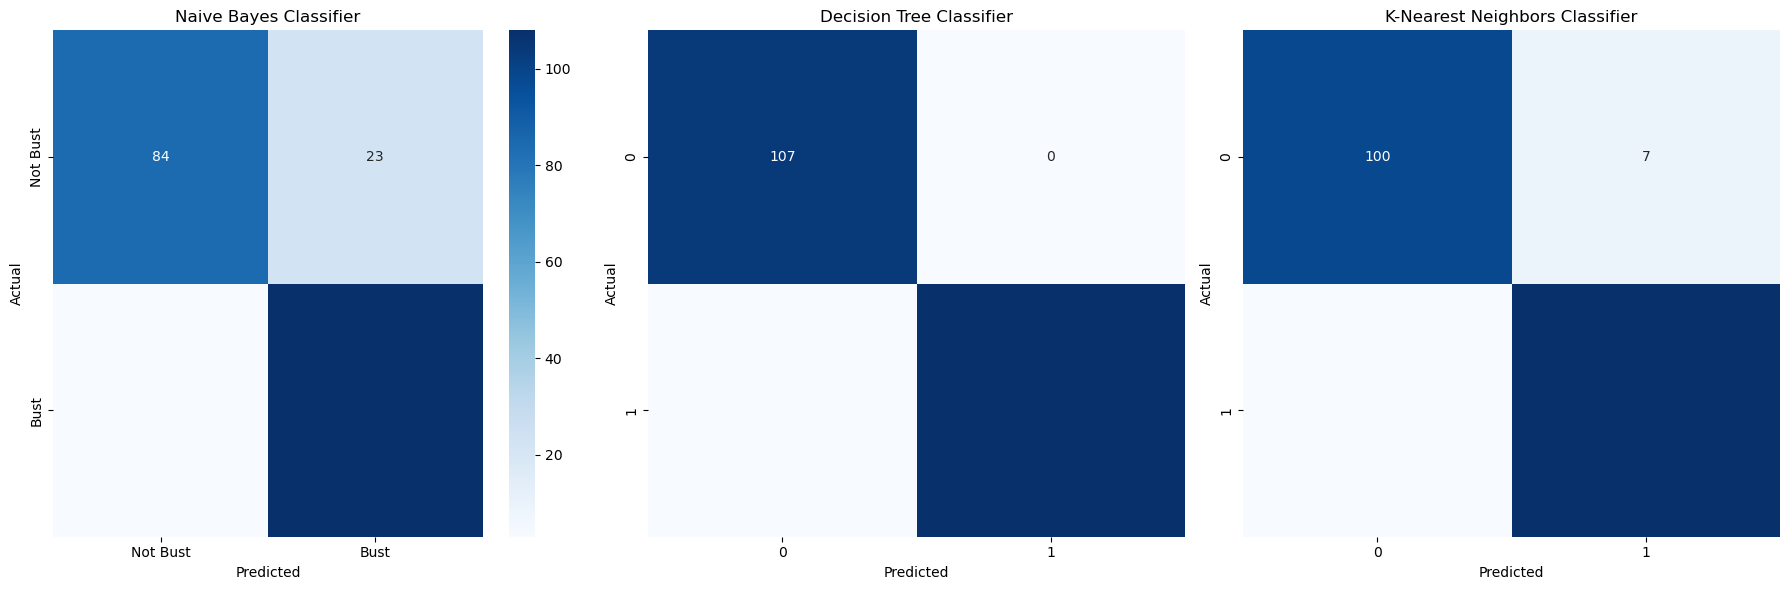

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions using the Naive Bayes classifier
y_pred_nb = nb_classifier.predict(X_test_cls)

# Compute confusion matrix for Naive Bayes Classifier
conf_matrix_nb = confusion_matrix(y_test_cls, y_pred_nb)

# Make predictions using the Decision Tree classifier
y_pred_dt = dt_classifier.predict(X_test_cls)

# Compute confusion matrix for Decision Tree Classifier
conf_matrix_dt = confusion_matrix(y_test_cls, y_pred_dt)

# Make predictions using the K-nearest neighbors classifier
y_pred_knn = knn_classifier.predict(X_test_cls)

# Compute confusion matrix for K-Nearest Neighbors Classifier
conf_matrix_knn = confusion_matrix(y_test_cls, y_pred_knn)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Naive Bayes Classifier
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='d', xticklabels=['Not Bust', 'Bust'], yticklabels=['Not Bust', 'Bust'], ax=axes[0])
axes[0].set_title('Naive Bayes Classifier')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree Classifier
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[1])
axes[1].set_title('Decision Tree Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# K-Nearest Neighbors Classifier
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[2])
axes[2].set_title('K-Nearest Neighbors Classifier')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [52]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Naive Bayes Classifier
accuracy_nb = accuracy_score(y_test_cls, y_pred_nb)
print(f"Accuracy (Naive Bayes Classifier): {accuracy_nb}")

# Calculate accuracy for Decision Tree Classifier
accuracy_dt = accuracy_score(y_test_cls, y_pred_dt)
print(f"Accuracy (Decision Tree Classifier): {accuracy_dt}")

# Calculate accuracy for K-Nearest Neighbors Classifier
accuracy_knn = accuracy_score(y_test_cls, y_pred_knn)
print(f"Accuracy (K-Nearest Neighbors Classifier): {accuracy_knn}")


Accuracy (Naive Bayes Classifier): 0.8807339449541285
Accuracy (Decision Tree Classifier): 1.0
Accuracy (K-Nearest Neighbors Classifier): 0.963302752293578


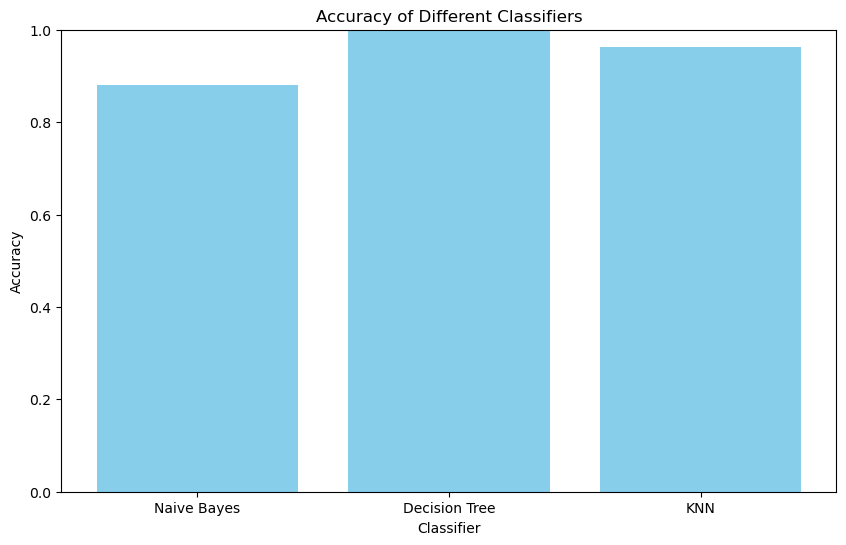

In [54]:
import matplotlib.pyplot as plt

# Define classifiers and their accuracy scores
classifiers = {
    'Naive Bayes': nb_accuracy,
    'Decision Tree': dt_accuracy,
    'KNN': knn_accuracy
}

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), classifiers.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy scores
plt.show()
